#### EMOTION DETECTION DATASET

## 1.0 DATA SOURCES
The Sentiment Analysis dataset was sourced from Kaggle, a leading platform for data science collaboration and competitions. It provides access to diverse datasets for exploring real-world problems.

This dataset falls under the Natural Language Processing (NLP) and Social Media domains. It's typically provided in CSV format and contains user-generated text (e.g., tweets), annotated with sentiment labels such as:
- Positive, Negative, Neutral

You can access the dataset via the following link: [Sentiment Analysis Dataset on Kaggle](https://www.kaggle.com/datasets/kushagra3204/sentiment-and-emotion-analysis-dataset/data)

## 1.1 TOOLS AND ENVIRONMENT
Python Notebook (Jupyter Notebook)

## 1.2 MODELLING APPROACH
- Model Built with Logistic Regression (LR)

- Model Built with Random Forest Classifier (RF)

- Model Built with Decision Tree Classifier (DT)

- Model Built with Extreme Gradient Boosting (XGB)

- Model Built with Long Short-Term Memory Network (LSTM)

- Model Built with Gated Recurrent Unit Network (GRU)

- Model Built with Convolutional Neural Network (CNN)

In [348]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [349]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [350]:

# Standard libraries
import os
import random
import shutil
import warnings
import import_ipynb
import sys

# Data processing libraries
import numpy as np
import pandas as pd
import joblib

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import scipy.stats as stats
import pyforest
from wordcloud import WordCloud
from textblob import TextBlob

# Terminal formatting
from colorama import Fore, Style
from termcolor import colored

# Scikit-learn utilities
from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, StratifiedKFold, KFold,
    cross_val_predict, cross_val_score, cross_validate, GridSearchCV
)
from sklearn.preprocessing import (
    StandardScaler, PolynomialFeatures, OneHotEncoder, PowerTransformer,
    MinMaxScaler, LabelEncoder, RobustScaler, label_binarize
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    mean_absolute_error, mean_squared_error, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc,
    make_scorer, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
)
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVR, SVC
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor,
    ExtraTreesRegressor, AdaBoostClassifier
)
from sklearn.feature_selection import (
    SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Optimization and tuning
from skopt import BayesSearchCV
from keras_tuner import BayesianOptimization
from keras_tuner.tuners import BayesianOptimization as KerasBayesianOptimization

# XGBoost
from xgboost import XGBClassifier, XGBRegressor, plot_importance

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    LSTM, GRU, Conv1D, GlobalMaxPooling1D, Embedding, Dense, Dropout
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [351]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Configurations
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Initialize plotly and cufflinks
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [352]:
import sys
sys.path.append('../functions')

from model_function import *


In [353]:
import importlib
import model_function  # first, import the module
importlib.reload(model_function)  # then reload it

<module 'model_function' from '/Users/madeniji/Documents/Pycharm_Dev/msc_sentemotion_analysis/model_src_code/run_scripts/../functions/model_function.py'>

In [354]:
data_path = '../dataset/combined_sentiment_data.csv'

In [355]:
df_sent = pd.read_csv(data_path)

In [356]:
print(len(df_sent))
print(len(df_sent.columns))

3309
2


In [357]:
#Check for top 5 datas using .head()
df_sent.head()

sentence  \
0  So there is no way for me to plug it in here in the US unless I go by a converter.   
1                                                         Good case, Excellent value.   
2                                                              Great for the jawbone.   
3     Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!   
4                                                                   The mic is great.   

  sentiment  
0  negative  
1  positive  
2  positive  
3  negative  
4  positive

In [358]:
#Check for last 5 datas using .tail()
df_sent.sample(5)

sentence  \
52    A usable keyboard actually turns a PDA into a real-world useful machine instead of just a neat gadget.   
680                                                                     And none of the tones is acceptable.   
1376                                          This was such an awesome movie that i bought it off of Ebay.     
1237                                                But what really made it unwatchable was the direction.     
203                                                   The best electronics of the available FM Transmitters.   

     sentiment  
52    positive  
680   negative  
1376  positive  
1237  negative  
203   positive

In [359]:
df_sent.describe()

sentence sentiment
count      3309      3309
unique     3289         2
top      #NAME?  positive
freq          4      1679

In [360]:
check_missing_values(df_sent)

Missing_Number  Missing_Percent
sentence            0.000            0.000
sentiment           0.000            0.000

In [361]:
# Rename 'sentence' column to 'batch'
df_sent.rename(columns={'sentence': 'sentence_raw'}, inplace=True)

# Apply cleaning function to the 'batch' column and store as 'sentence'
df_sent['sentence'] = df_sent['sentence_raw'].apply(clean_text)

# Print original and cleaned version of row 50
pd.set_option('display.max_colwidth', None)
print(df_sent.iloc[50]['sentence_raw'])      # raw text
print(df_sent.iloc[50]['sentence'])         # cleaned text


Not loud enough and doesn't turn on like it should.
not loud enough and doesn t turn on like it should


In [362]:
# Drop the raw column
df_sent.drop(columns=['sentence_raw'], inplace=True)
df_sent = df_sent.dropna(subset=['sentence', 'sentiment'])
df_sent = df_sent[['sentence', 'sentiment']]
df_sent = df_sent[~df_sent['sentence'].str.strip().str.lower().eq('#name?')]
df_st_clean = df_sent.copy()

In [363]:
display(df_st_clean)

sentence  \
0                                                        so there is no way for me to plug it in here in the us unless i go by a converter   
1                                                                                                                good case excellent value   
2                                                                                                                    great for the jawbone   
3                                                               tied to charger for conversations lasting more than minutes major problems   
4                                                                                                                         the mic is great   
...                                                                                                                                    ...   
3304                                      online anonymity enables freedom of expression but also facilitates cyberbullying and harassment   
3305  smart cities leverage data and technology to improve urban infrastructure but raise concerns about surveillance and privacy invasion   
3306                      biometric identification technologies offer convenience and security but also raise ethical and privacy concerns   
3307                                         data ethics guidelines are essential for ensuring responsible and equitable use of technology   
3308      decentralized technologies such as blockchain have the potential to disrupt traditional power structures and empower individuals   

     sentiment  
0     negative  
1     positive  
2     positive  
3     negative  
4     positive  
...        ...  
3304  negative  
3305  positive  
3306  negative  
3307  positive  
3308  positive  

[3309 rows x 2 columns]

In [364]:
# inspect_columns(df_st_clean, cols=['sentence', 'sentiment'])

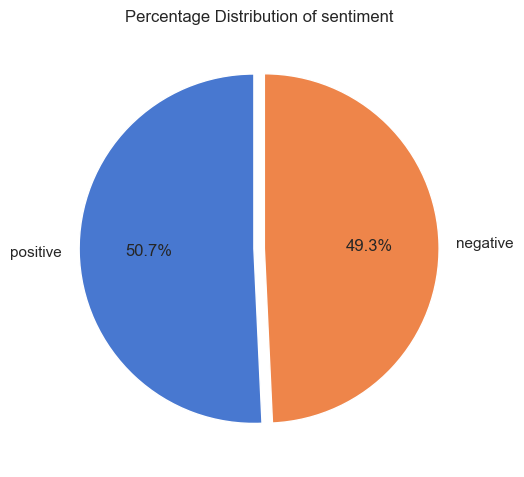

sentiment
positive     1679
negative     1630
Name: count, dtype: int64


In [365]:
plot_categorical_distributions(columns_categorical=['sentiment'], data=df_st_clean)

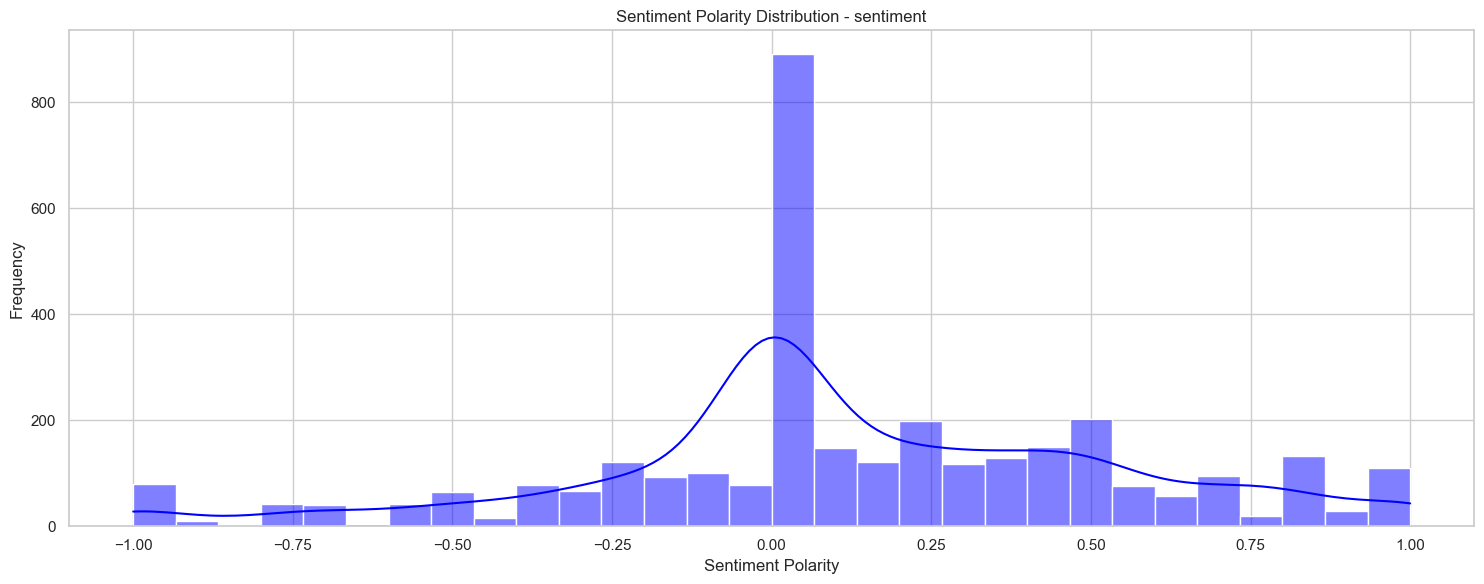

In [366]:
plot_sentiment_distribution(data=df_st_clean, text_column='sentence',df_name='sentiment')

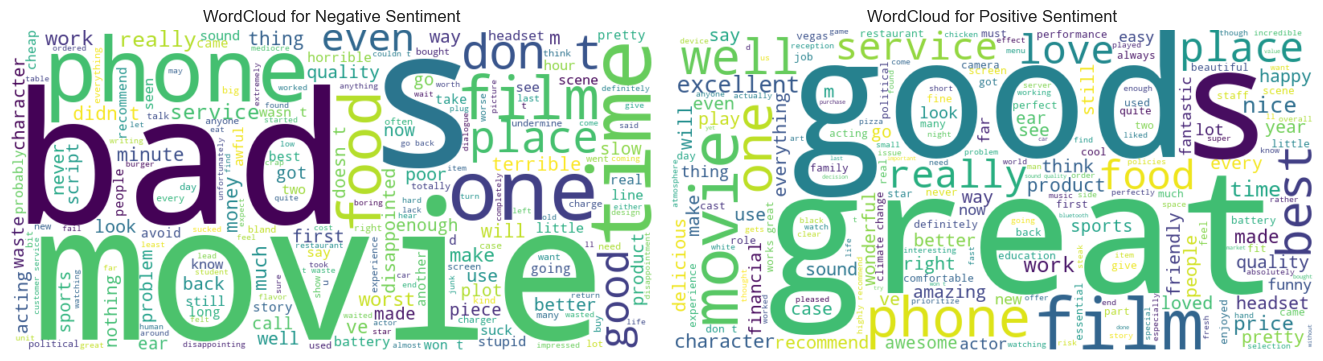

In [367]:
plot_wordcloud(df_st_clean, 'sentiment', 'sentence')

In [368]:
vectorizer_path = "../save_sent_models/ml_sent_vectorizer.pkl"

In [369]:
opt_sent_summary_list = []
opt_sent_summary_list.clear()


=== logistic_regression ===
Best Params: OrderedDict([('C', 17.76576664980768)])

Comparison of Metrics Between Logistic Regression Models:


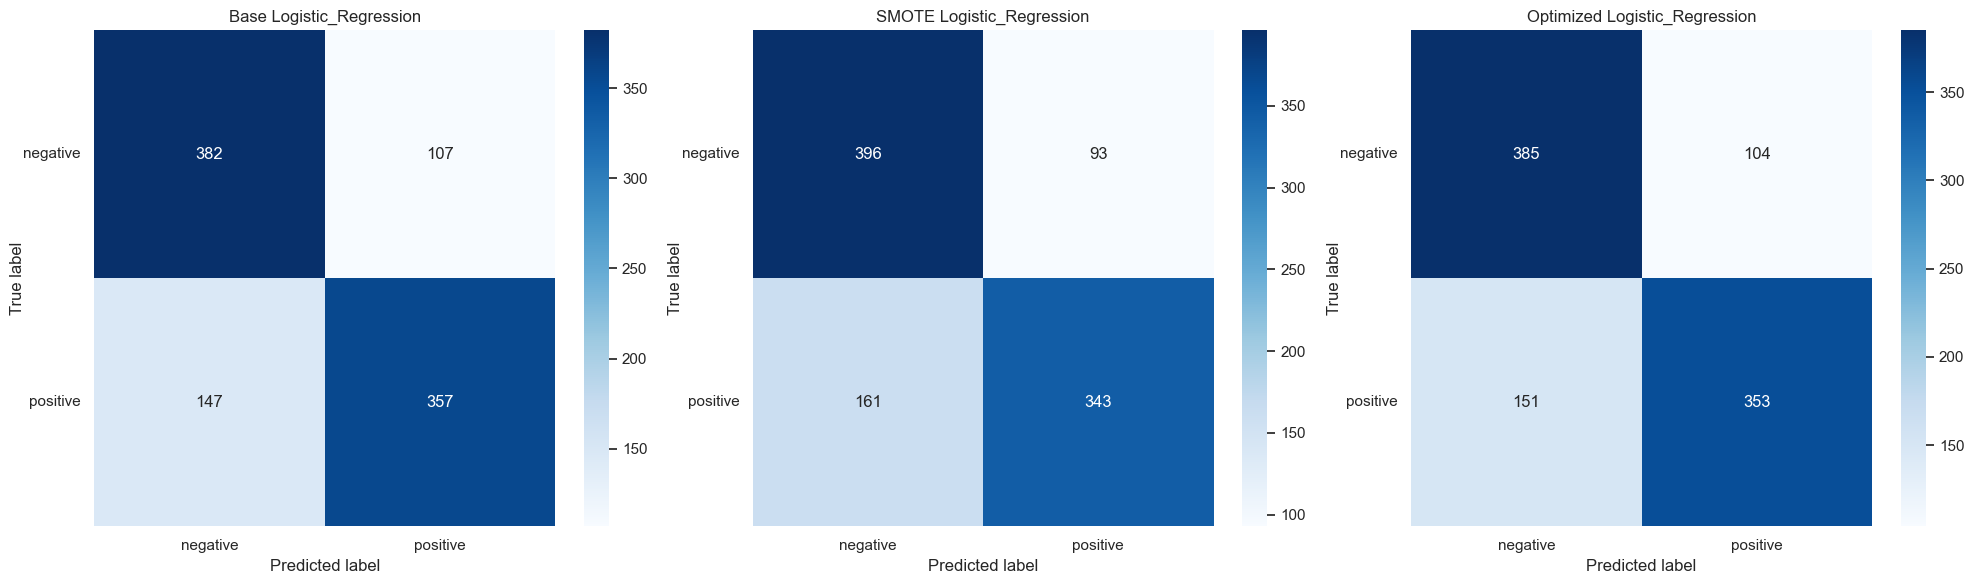

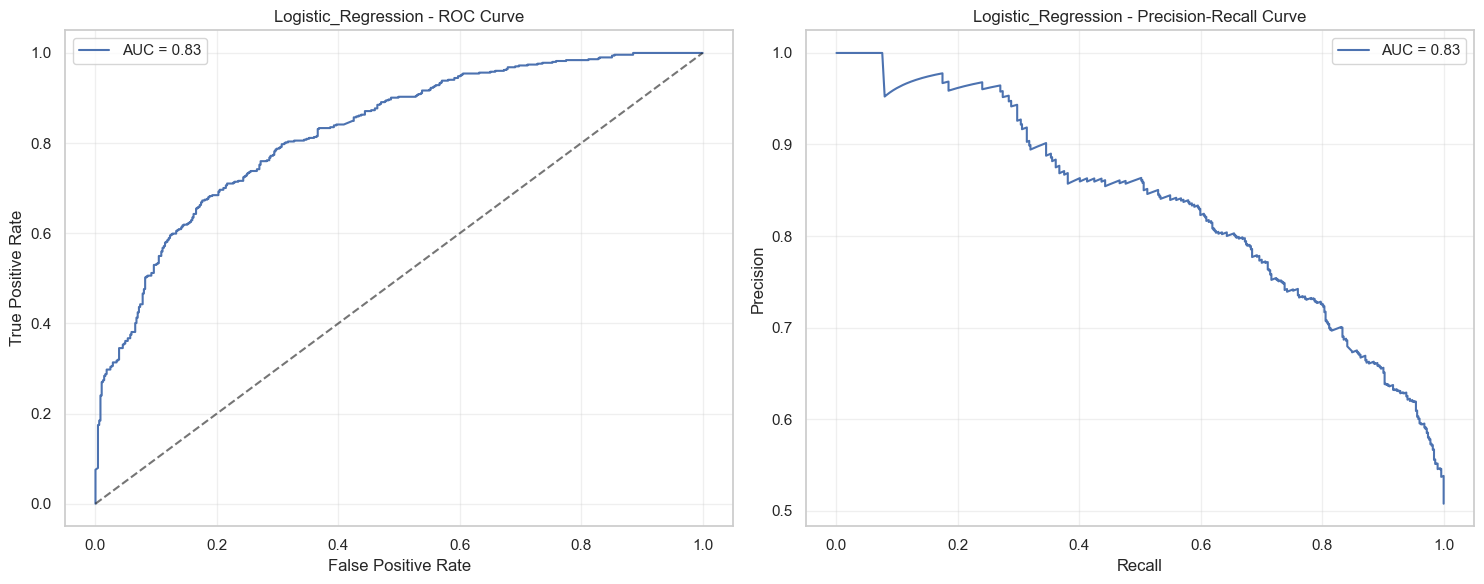

In [370]:
# === RUN END-TO-END ===
results, preds, best_model = run_ml_workflow(df_st_clean, "sentence",
                                             "sentiment", "logistic_regression",
                                              vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "logistic_regression", best_model, opt_sent_summary_list)

# Display summary
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Logistic Regression Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "Logistic_Regression")
plot_training_metrics(preds, "Logistic_Regression")


=== naive_bayes ===
Best Params: OrderedDict([('alpha', 0.42149456283334996)])

Comparison of Metrics Between Naive Bayes Models:


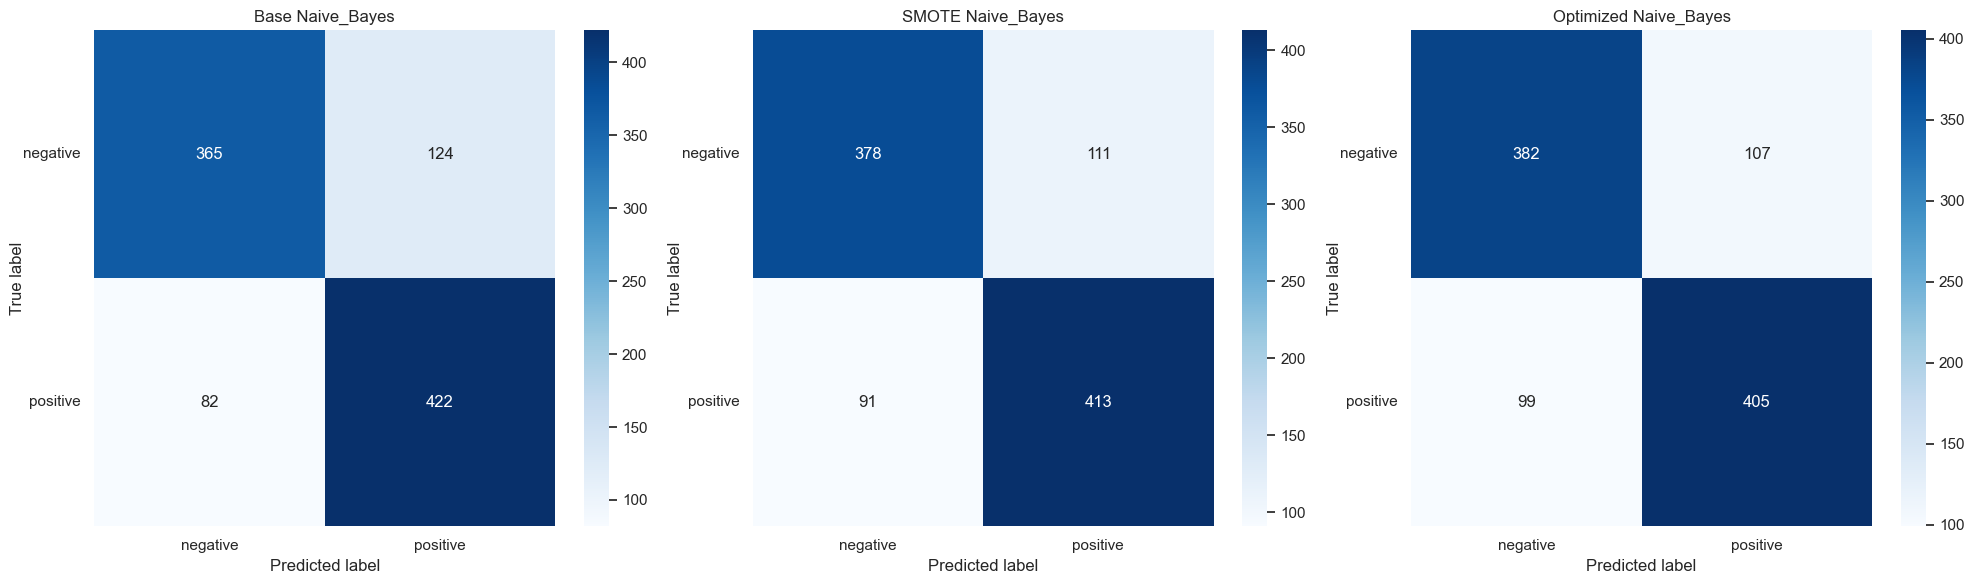

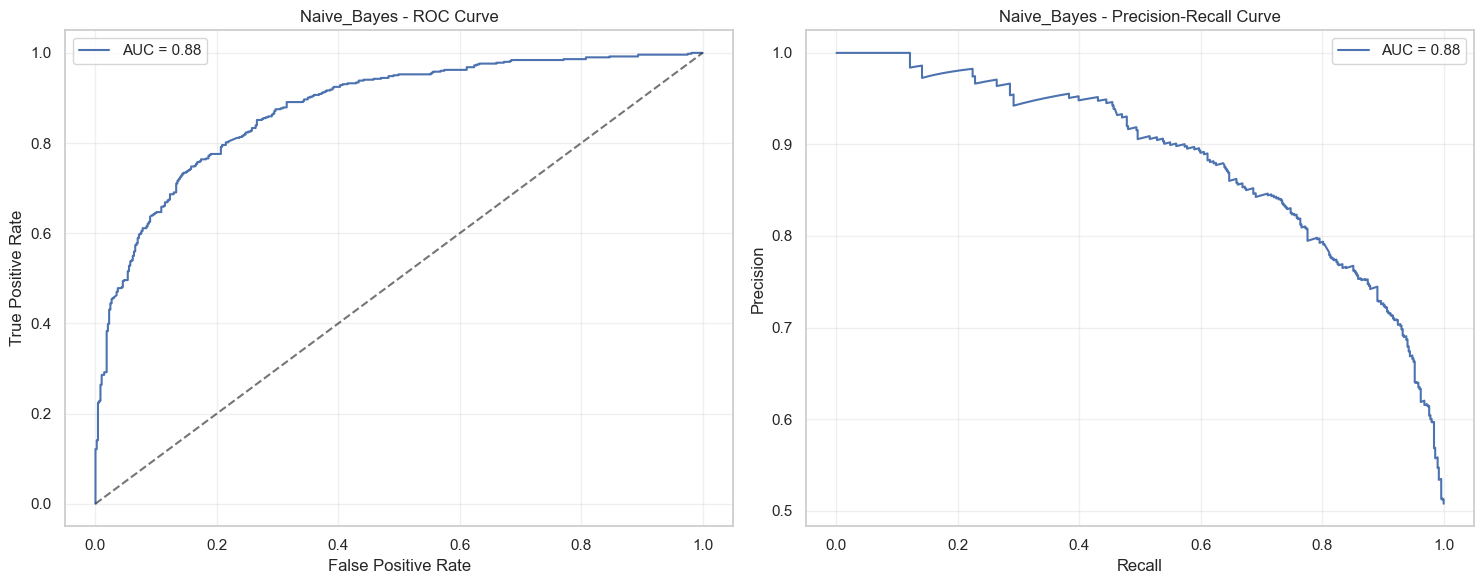

In [371]:
results, preds, best_model = run_ml_workflow(df_st_clean, "sentence",
                                             "sentiment", "naive_bayes", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "naive_bayes", best_model, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Naive Bayes Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "Naive_Bayes")
plot_training_metrics(preds, "Naive_Bayes")


=== random_forest ===
Best Params: OrderedDict([('max_depth', 13), ('n_estimators', 182)])

Comparison of Metrics Between Random Forest Models:


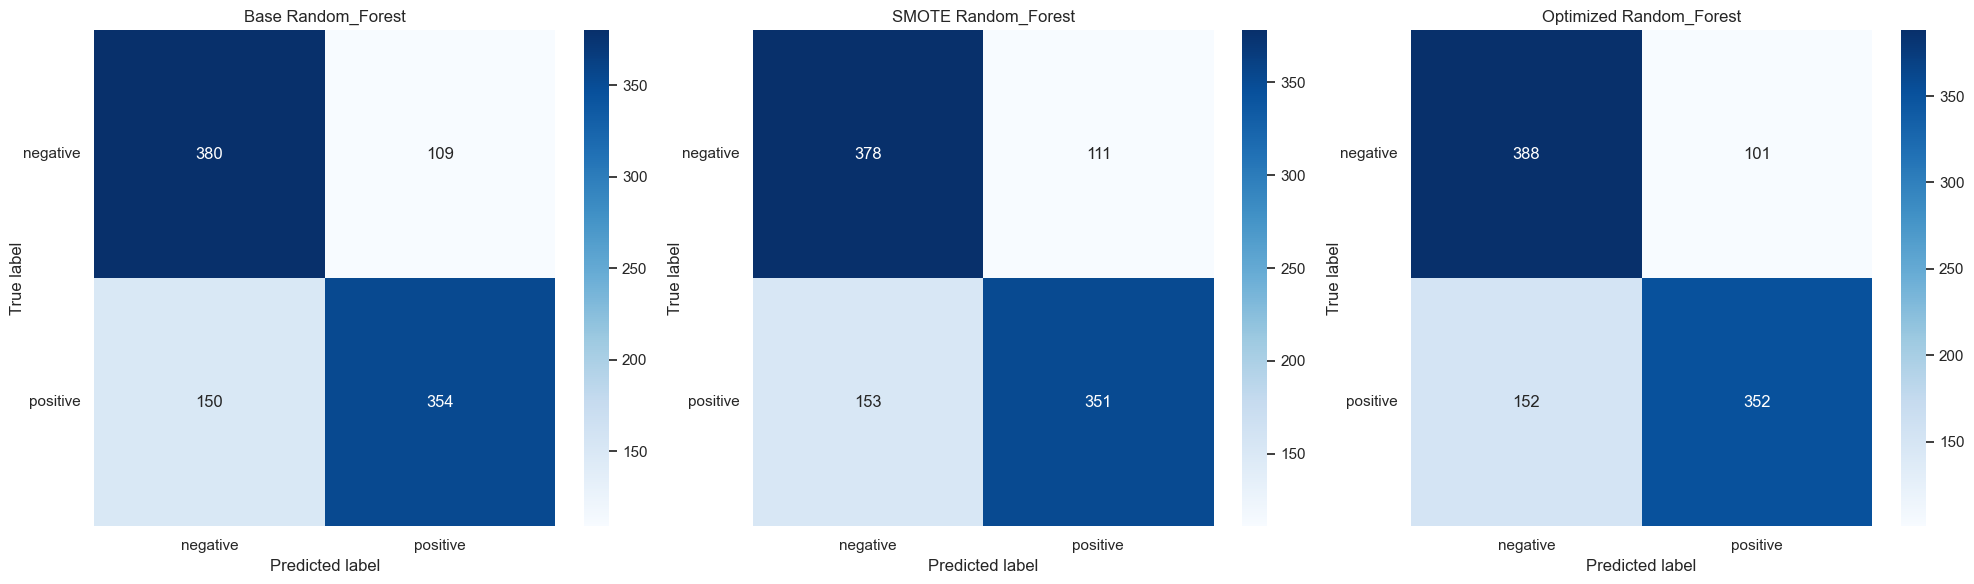

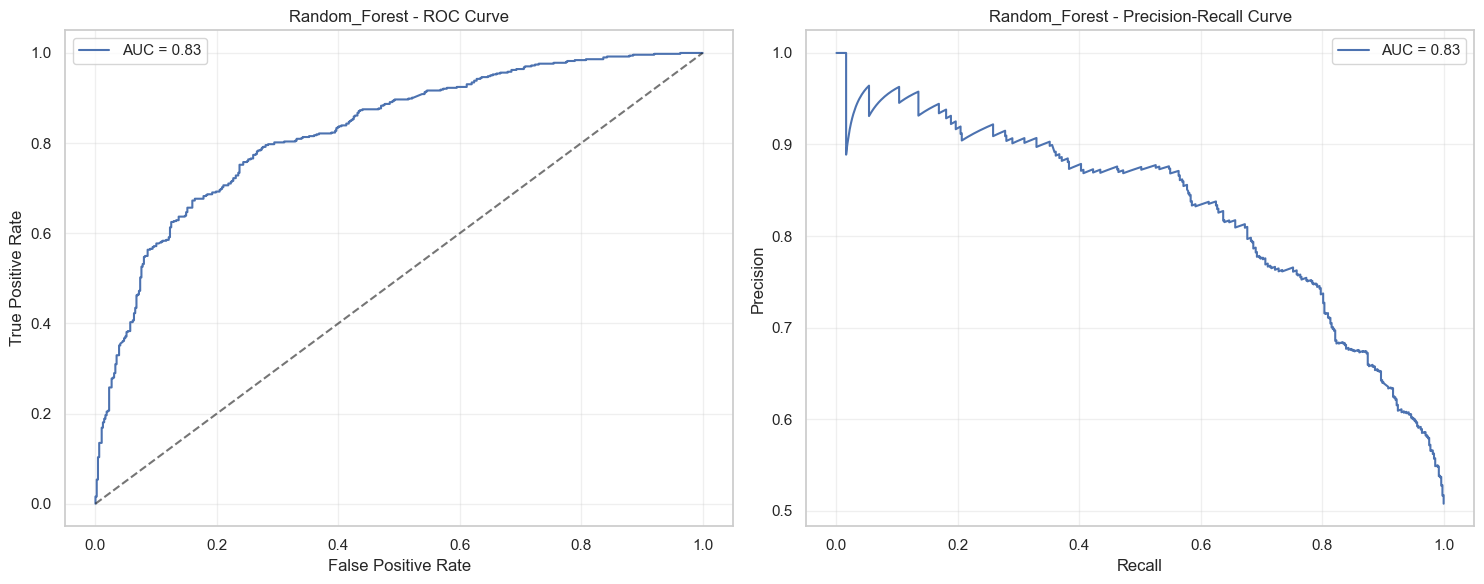

In [372]:
results, preds, best_model = run_ml_workflow(df_st_clean, "sentence",
                                             "sentiment", "random_forest", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "random_forest", best_model, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Random Forest Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "Random_Forest")
plot_training_metrics(preds, "Random_Forest")


=== xgboost ===


/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:36:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:36:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:36:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:36:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

Best Params: OrderedDict([('learning_rate', 0.15171809566296443), ('max_depth', 5), ('n_estimators', 129)])

Comparison of Metrics Between XGBoost Models:


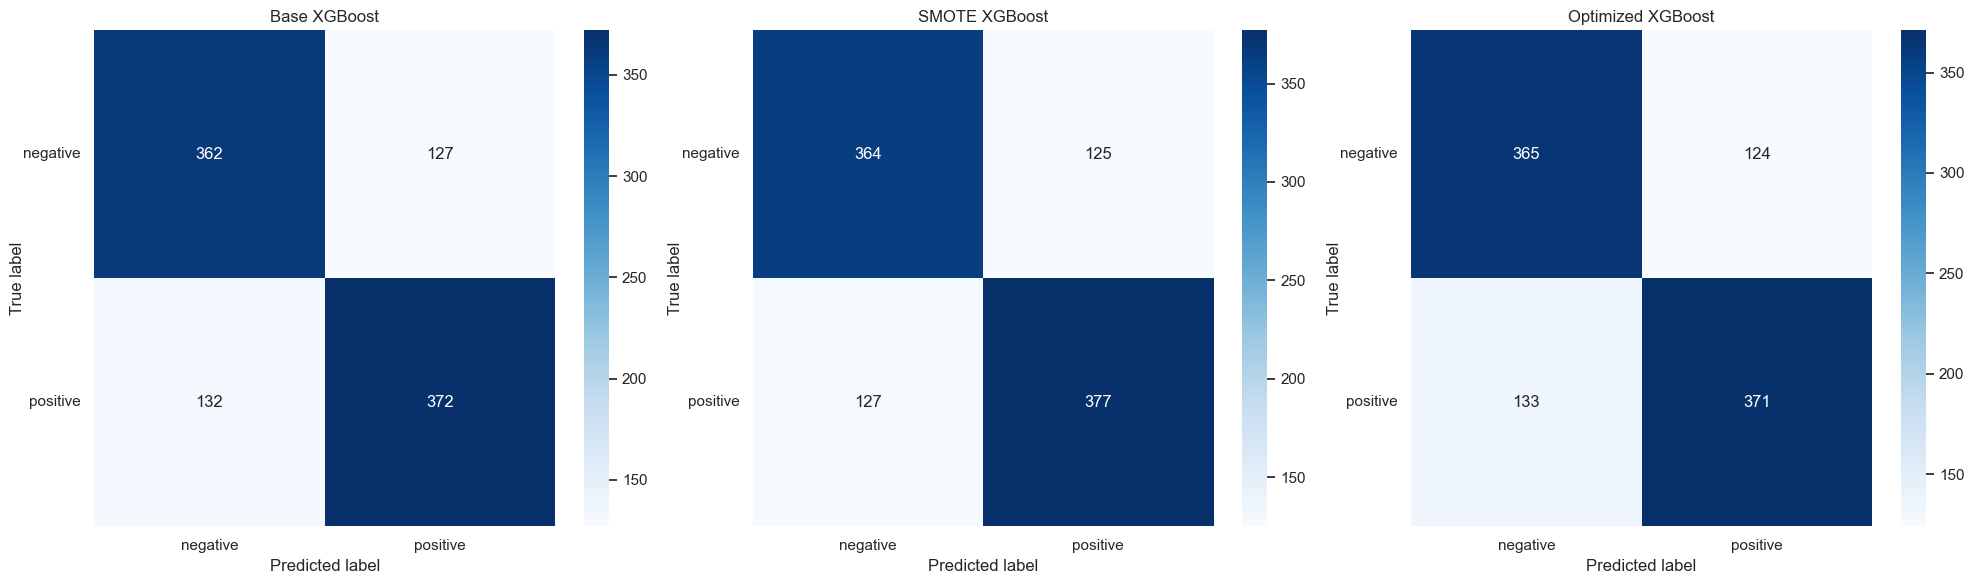

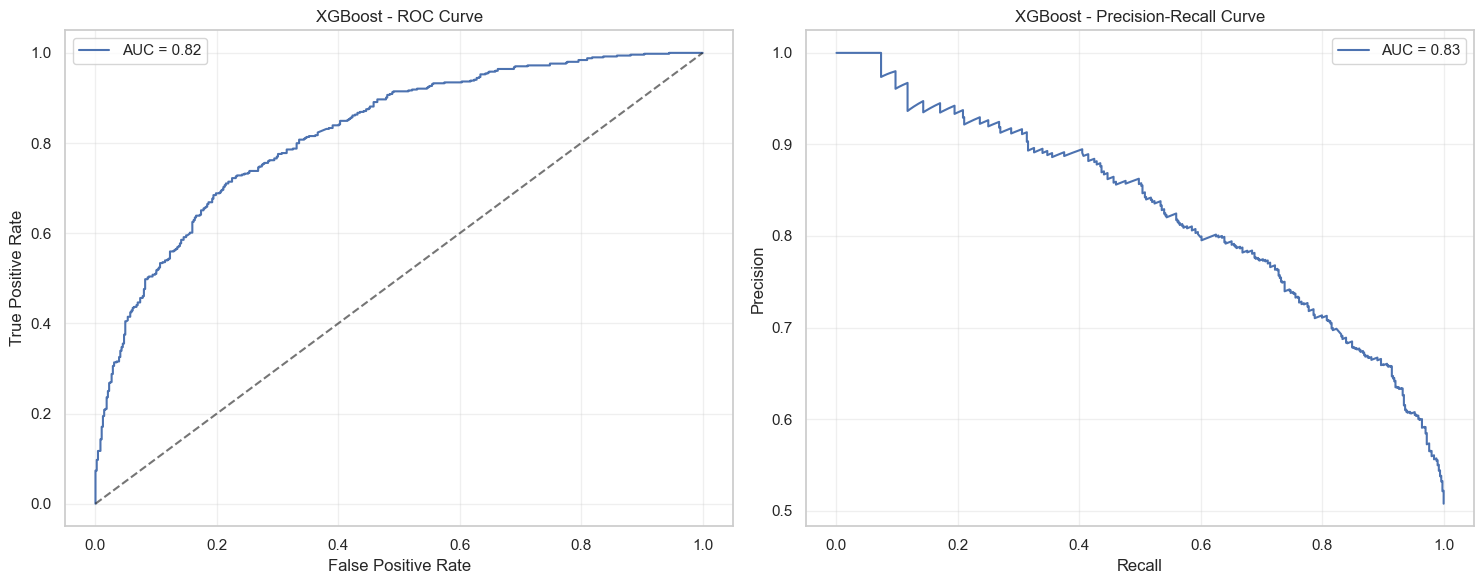

In [373]:
results, preds, best_model = run_ml_workflow(df_st_clean, "sentence",
                                             "sentiment", "xgboost", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "xgboost", best_model, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between XGBoost Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "XGBoost")
plot_training_metrics(preds, "XGBoost")

## DEEP LEARNING MODEL

In [374]:
tokenizer_path = "../save_sent_models/dl_sent_tokenizer.pkl"

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

Comparison of Metrics Between LSTM Models:


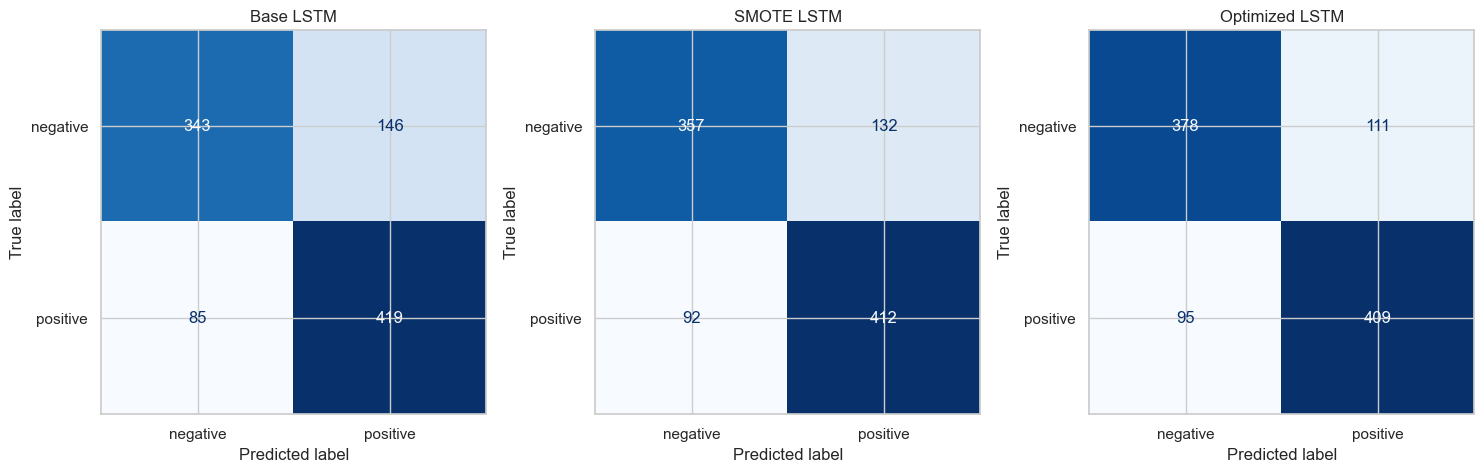

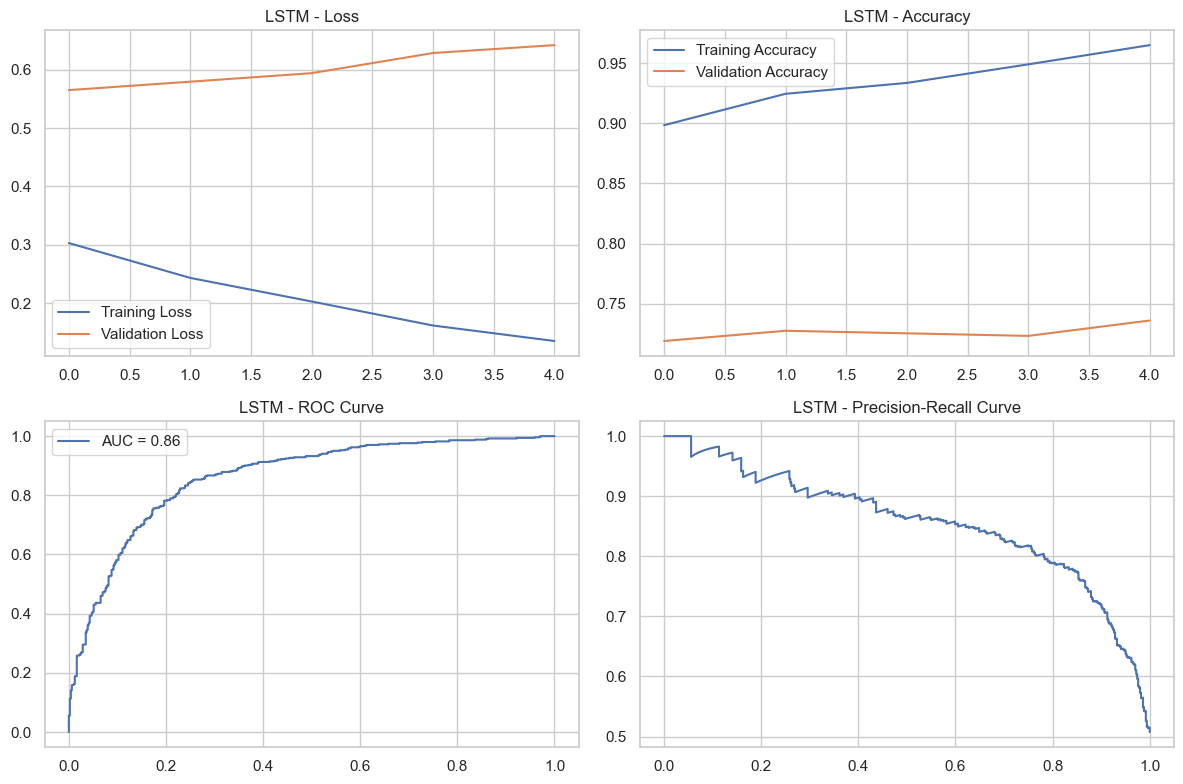

In [375]:
results, preds, opt_history = run_dl_workflow(df_st_clean, "sentence",
                                              "sentiment", "LSTM", tokenizer_path
                                              )
# Append the optimized summary
append_optimized_metrics(results, "LSTM", opt_history, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between LSTM Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_dl_confusion_matrices(preds, "LSTM")
plot_dl_training_metrics(opt_history, preds, "LSTM")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

Comparison of Metrics Between GRU Models:


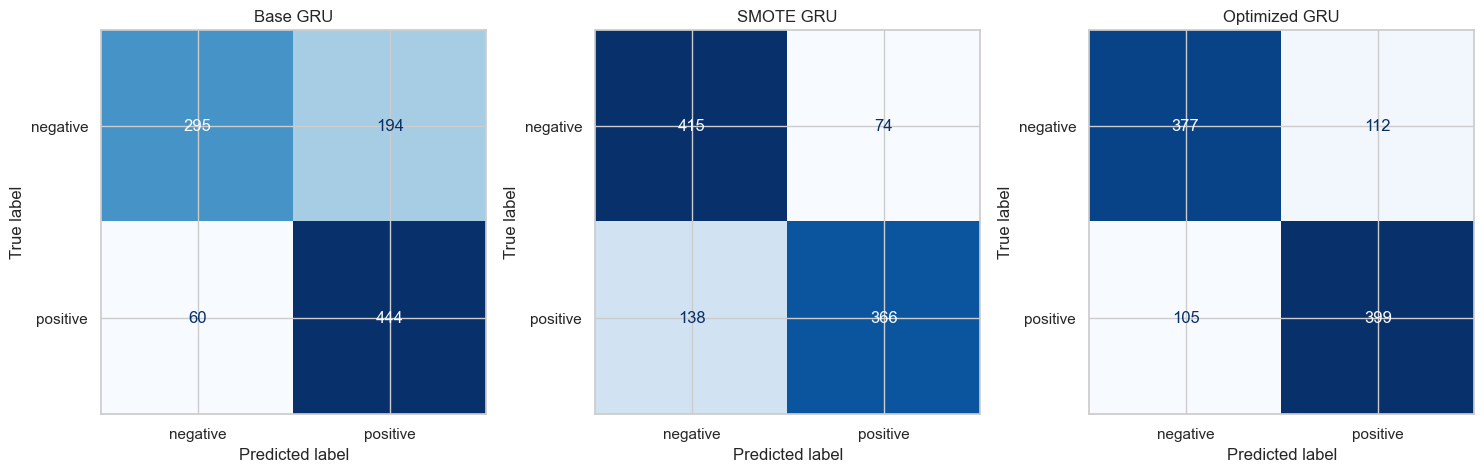

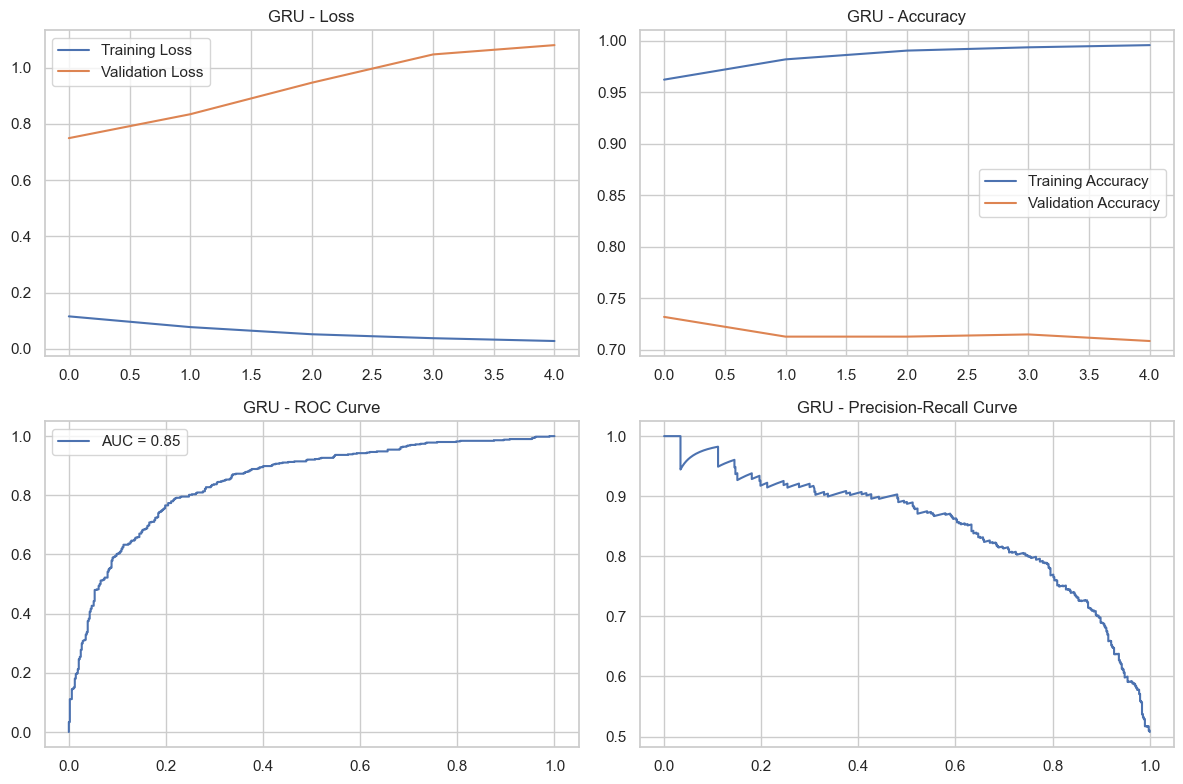

In [376]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_st_clean, "sentence",
                                              "sentiment", "GRU", tokenizer_path)
# Append the optimized summary
append_optimized_metrics(results, "GRU", opt_history, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between GRU Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_dl_confusion_matrices(preds, "GRU")
plot_dl_training_metrics(opt_history, preds, "GRU")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Comparison of Metrics Between CNN Models:


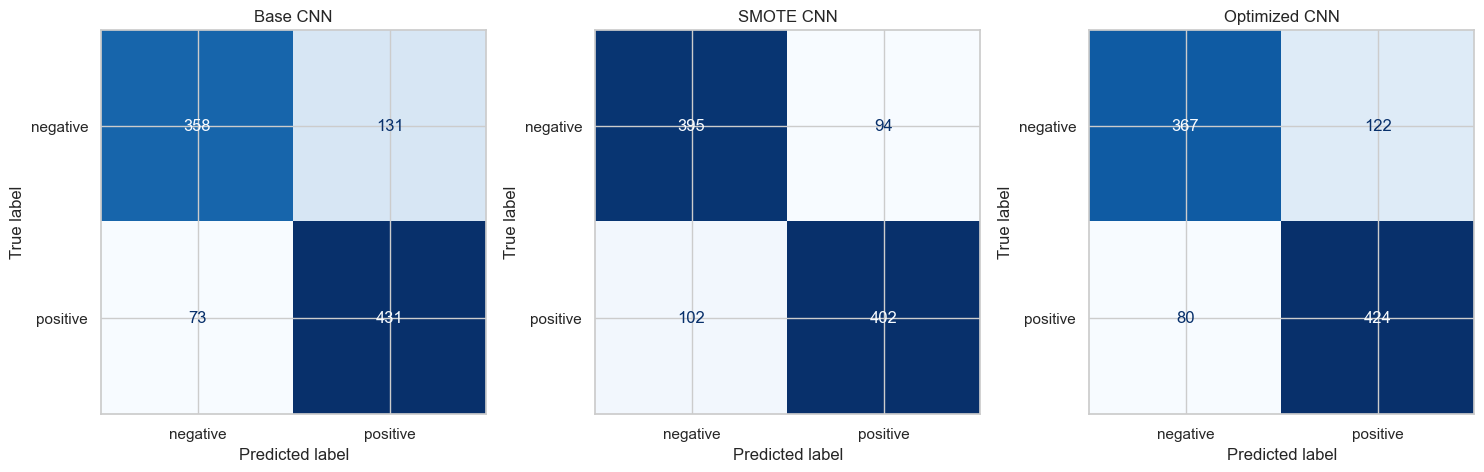

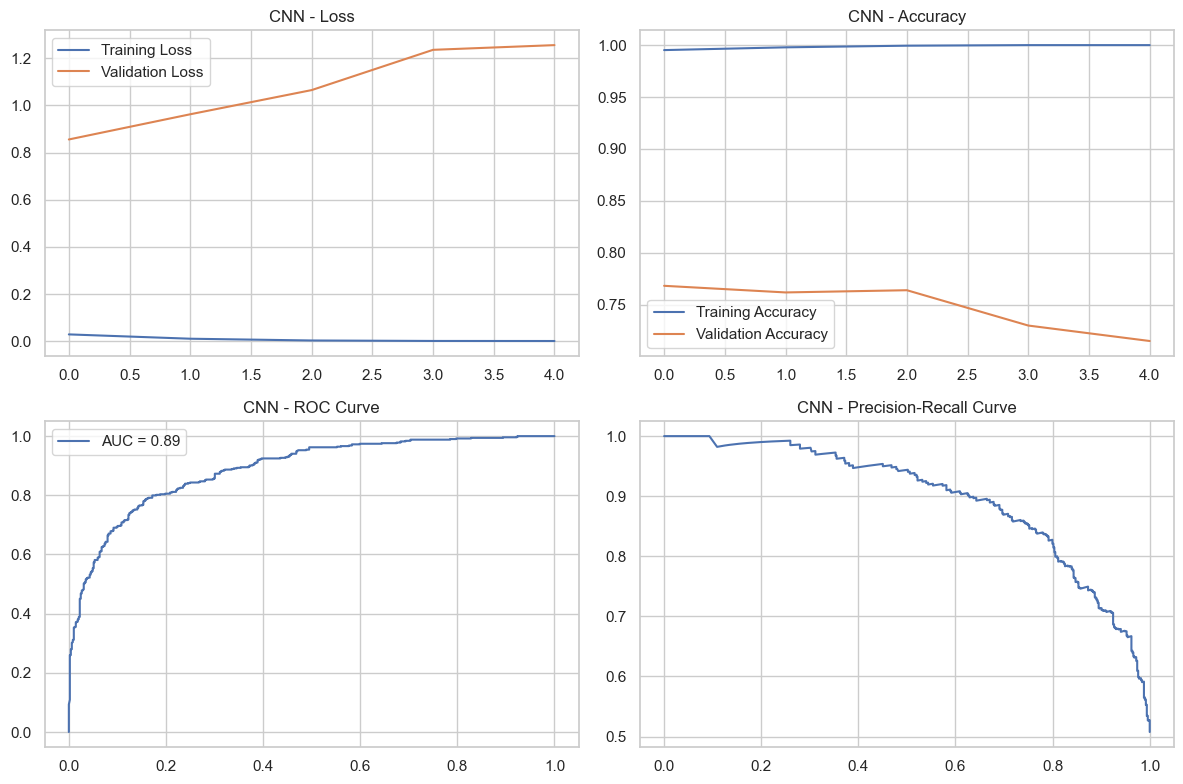

In [377]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_st_clean, "sentence",
                                              "sentiment", "CNN", tokenizer_path
                                              )
# Append the optimized summary
append_optimized_metrics(results, "CNN", opt_history, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between CNN Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_dl_confusion_matrices(preds, "CNN")
plot_dl_training_metrics(opt_history, preds, "CNN")

In [378]:
opt_summary_df = pd.DataFrame(opt_sent_summary_list)
# display(opt_summary_df)

# # Sort by F1-Score in descending order
ranked_df = opt_summary_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
ranked_df["Rank"] = ranked_df.index + 1           # rank column
df_rank = ranked_df.drop(columns=['Rank'], errors='ignore')

df_rank = df_rank.copy()

In [379]:
# Create directory if it doesn't exist
os.makedirs("../save_sent_models", exist_ok=True)

# Loop through all ranked models and save with position
for idx, row in df_rank.iterrows():
    model = row["Object"]
    model_name = row["Model"].lower().replace(" ", "_")  # sanitize name
    filename = f"sent_{idx+1}_{model_name}_model.pkl"
    filepath = os.path.join("../save_sent_models", filename)

    joblib.dump(model, filepath)
    print(f"Saved: {filename}")


Saved: sent_1_cnn_model.pkl
Saved: sent_2_naive_bayes_model.pkl
Saved: sent_3_lstm_model.pkl
Saved: sent_4_gru_model.pkl
Saved: sent_5_random_forest_model.pkl
Saved: sent_6_logistic_regression_model.pkl
Saved: sent_7_xgboost_model.pkl


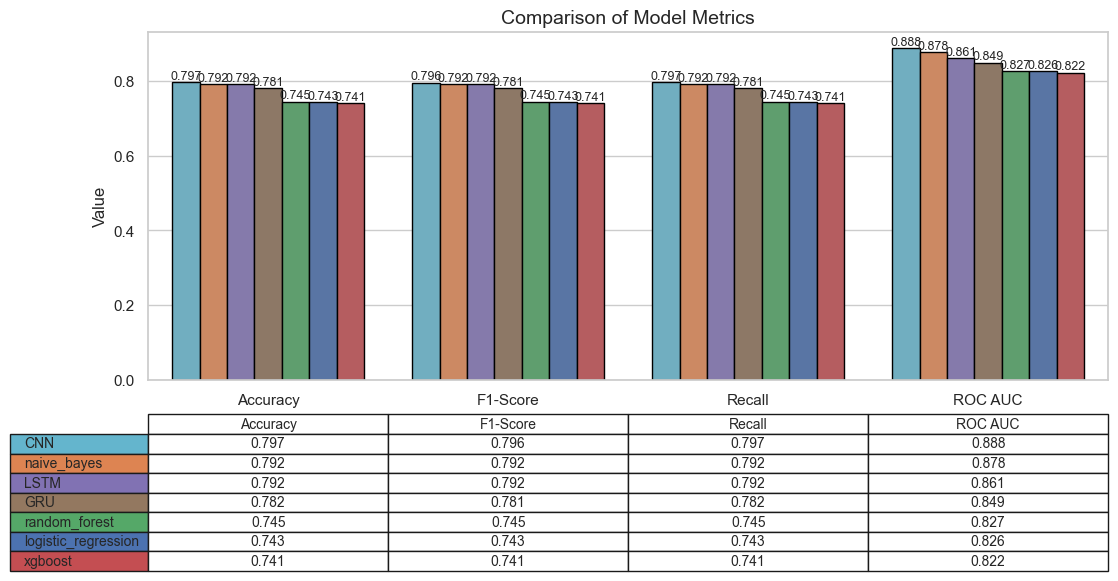

In [381]:
plot_model_comparison(df_rank)